In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\K-Means & Hirarchical Clustering\50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
print(df.columns)
print(df.dtypes)

Index(['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'], dtype='object')
RND       float64
ADMIN     float64
MKT       float64
STATE      object
PROFIT    float64
dtype: object


In [5]:
# Encode the 'STATE' column using LabelEncoder
label_encoder = LabelEncoder()
df['STATE'] = label_encoder.fit_transform(df['STATE'])

# Check the dataset again to confirm encoding
df.head()


,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT']])

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT'])


In [8]:
# Apply AgglomerativeClustering on the scaled data (considering the 'PROFIT' column)
# Using a reasonable number of clusters (adjust as needed)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

# Fit the model and assign cluster labels
df['Cluster'] = hc.fit_predict(scaled_df[['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT']])

# Check the first few rows with cluster labels
df.head()


,RND,ADMIN,MKT,STATE,PROFIT,Cluster
0,165349.20,136897.80,471784.10,2,192261.83,0
1,162597.70,151377.59,443898.53,0,191792.06,3
2,153441.51,101145.55,407934.54,1,191050.39,0
3,144372.41,118671.85,383199.62,2,182901.99,0
4,142107.34,91391.77,366168.42,1,166187.94,0


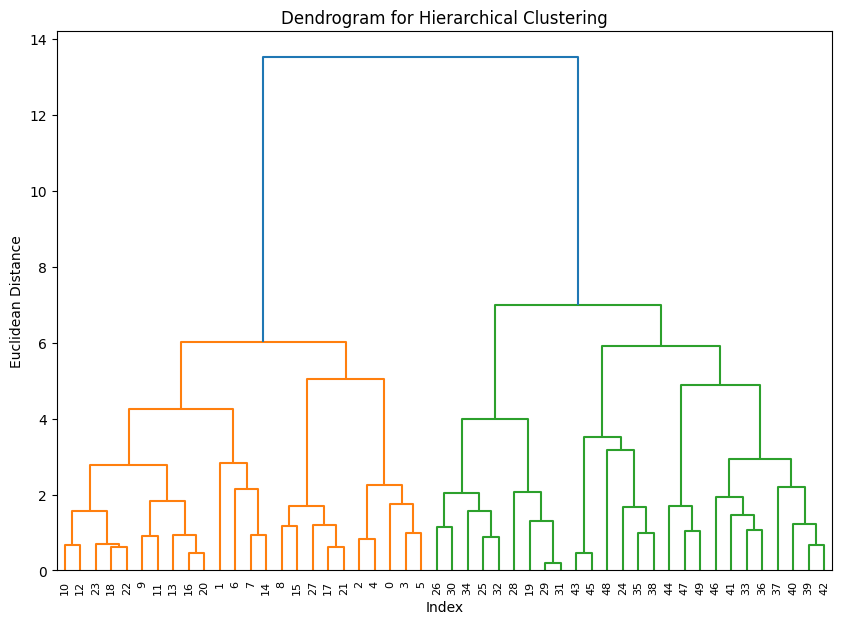

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate the linkage matrix
linked = linkage(scaled_df[['RND', 'ADMIN', 'MKT', 'STATE', 'PROFIT']], method='ward')

# Create the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()


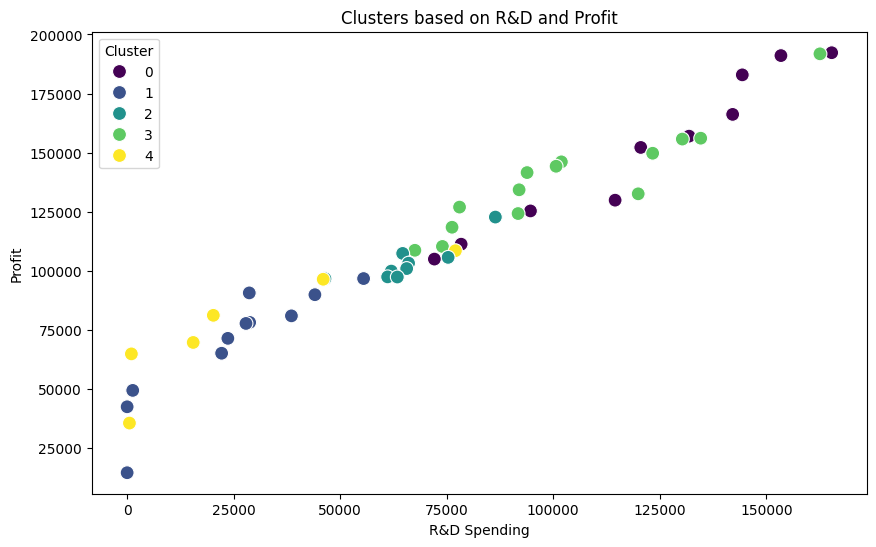

In [10]:
# Plot the clusters based on PROFIT
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RND'], y=df['PROFIT'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Clusters based on R&D and Profit')
plt.xlabel('R&D Spending')
plt.ylabel('Profit')
plt.show()
